# Planner of Transits Observation - PTO
This is a tutorial example for using PTO. The purpose of this code is to calculate transit windows (emission phase to be added soon) for given time period and location to observe from. It can be used for proposal writing, and further for preparation of the observations.

The main steps in PTO are:
1. Load a catalog of planets
    - Currently only NASA Exoplanet archive is implemented. To be expanded on.
2. Filter the catalog to desired target
3. Calculate transit windows
4. Plot observing conditions for each night for given location

<div class="alert alert-block alert-info">
<b>Tip:</b> Generally, most functions and methods are well documented. You can get a hint by hovering mouse over the function name. You can also get the documentation by help(`function_name`).
</div>



## Databases of planets
### Catalog class
PTO has a implemented class `CatalogComposite` and `CatalogFull` in the `PTO.database.catalog` module that provides the general framework for all the databases. Furthermore, NASA exoplanet archive is implemented as the default database to filter through.

`CatalogComposite` is a class where each planet has only a single entry. This corresponds to the PS Composite table from NASA Exoplanet archive. `CatalogFull` is a class where each single reference has different entry. This corresponds to the full PS table from NASA Exoplanet archive. 

TODO: NASA Exoplanet archive PS composite table needs two versions. One based on archive and one based on most precise set of parameters.


## NASA exoplanet archive:
Three different versions of NASA exoplanet archive Planetary System catalog are available.
1. `NASA_Exoplanet_Archive_CompositeDefault`
    - The default Composite table as extracted from NASA archive
2. `NASA_Exoplanet_Archive_CompositeMostPrecise`
    - Composite table with the most precise values to date
    - Not Implemented Yet
3. `NASA_Exoplanet_Archive_FullTable`
    - Full table as loaded from the NASA archive
    - Not Implemented Yet

The difference between `NASA_Exoplanet_Archive_CompositeDefault` and `NASA_Exoplanet_Archive_CompositeMostPrecise` is that the former does not necessarily provide the most precise values. Using the latter is more preferable, as the values are selected based on the $1\sigma$ errorbars on the values.

In [1]:
from PTO.database.NASA_exoplanet_archive import NASA_Exoplanet_Archive_CompositeDefault

Catalogue = NASA_Exoplanet_Archive_CompositeDefault()
Catalogue.load_API_table()


  INFO     | Trying to load NASA Exoplanet Archive Composite table
  INFO     | File saved succesfully in:
  INFO     |     /media/chamaeleontis/Observatory_main/Code/observations_transits/PTO/saved_files/CatalogComposite.pkl


## Calculation of related parameters:
NASA exoplanet archive typically does not calculate any related parameters, even if it can. The `Catalog` classes have a `_get_all()` method that is run immediatelly after loading the data. This will recalculate those values, including the error, for multiple parameters. For example, a unit conversion between Earth and Jupiter is not always provided, which can lead to some planets being ignored unintentionally when filtering. The conversion is never done on entries where the value already exists.

<div class="alert alert-block alert-warning">
<b>Warning:</b> Due to limitations of astropy nddata package, the error propagation is done on maximum of the lower and upper error. This means, that if the uncertainty of a parameter is unequal, the resulting uncertainty is going to be larger than necessary. 
</div>

For transit related parameters, a `Flag.Transit` is enforced to be true in order to calculate the parameters. This means, that although you can in principle calculate $b$ (impact parameter) as long as you have $i$ (inclination) $R_s$ (Stellar radius) and $a$ (semimajor axis), it won't be calculated unless the transits were detected.

## Keys available
As there are many different parameters, few convenience functions are provided to list all available keys in the main table.

To print all keys, you can use `Catalogue.print_all_keys()`.
For a particular set of keys, you can use:
- `Catalogue.print_position_keys()`

- `Catalogue.print_system_keys()`

- `Catalogue.print_star_keys()`

- `Catalogue.print_planet_keys()`

- `Catalogue.print_discovery_keys()`

- `Catalogue.print_magnitude_keys()`

- `Catalogue.print_flag_keys()`



In [2]:
Catalogue.print_all_keys()

  PRINT    | =========================
  PRINT    | Position keys:
  PRINT    | =========================
  PRINT    | Position.Declination
  PRINT    | Position.Declination.Reference
  PRINT    | Position.Declination.Error.Upper
  PRINT    | Position.Declination.Error.Lower
  PRINT    | Position.EclipticLatitude
  PRINT    | Position.EclipticLatitude.Reference
  PRINT    | Position.EclipticLatitude.Error.Upper
  PRINT    | Position.EclipticLatitude.Error.Lower
  PRINT    | Position.EclipticLongitude
  PRINT    | Position.EclipticLongitude.Reference
  PRINT    | Position.EclipticLongitude.Error.Upper
  PRINT    | Position.EclipticLongitude.Error.Lower
  PRINT    | Position.GalacticLatitude
  PRINT    | Position.GalacticLatitude.Reference
  PRINT    | Position.GalacticLatitude.Error.Upper
  PRINT    | Position.GalacticLatitude.Error.Lower
  PRINT    | Position.GalacticLongitude
  PRINT    | Position.GalacticLongitude.Reference
  PRINT    | Position.GalacticLongitude.Error.Upper
  PRINT 

## Plotting the sample:
There are several functions provided to plot the exoplanet population and (further) filtered target sample.

The idea behind the plotting functions is that multiple (over-)plots can be done on the same figure. To do so, the `plt.Axes` artist (typically `ax`), can be passed to all plot functions. By default, if `ax` is not passed, a new plot gets created instead.

As there are many aspects of the plot that can be changed, the resulting `ax` is always returned. This allows for further modification (like linear vs log scales of axis) outside the functions.

Let's make a plot usable for proposal. For this case, we will focus on a sample of ultra hot Jupiters $T_{eq}<2000K$.

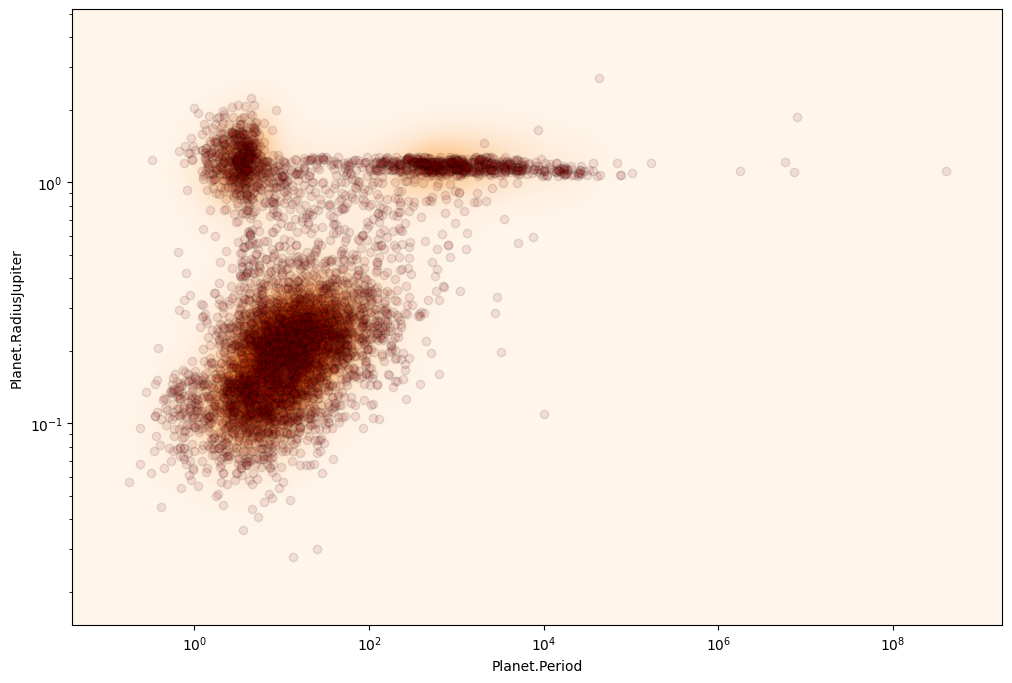

In [7]:
fig, ax = Catalogue.plot_diagram(
    x_key = 'Planet.Period',
    y_key = 'Planet.RadiusJupiter',
)

## Adjusting plots:
As you can see, the default plot has way too wide range for proposal aiming at close-in planets. Lets adjust the x-axis range

In [1]:
ax.set_xlim(10E-2,10E1)
fig.show()

NameError: name 'ax' is not defined

## Themes
The plots have defined several themes to use. For example:

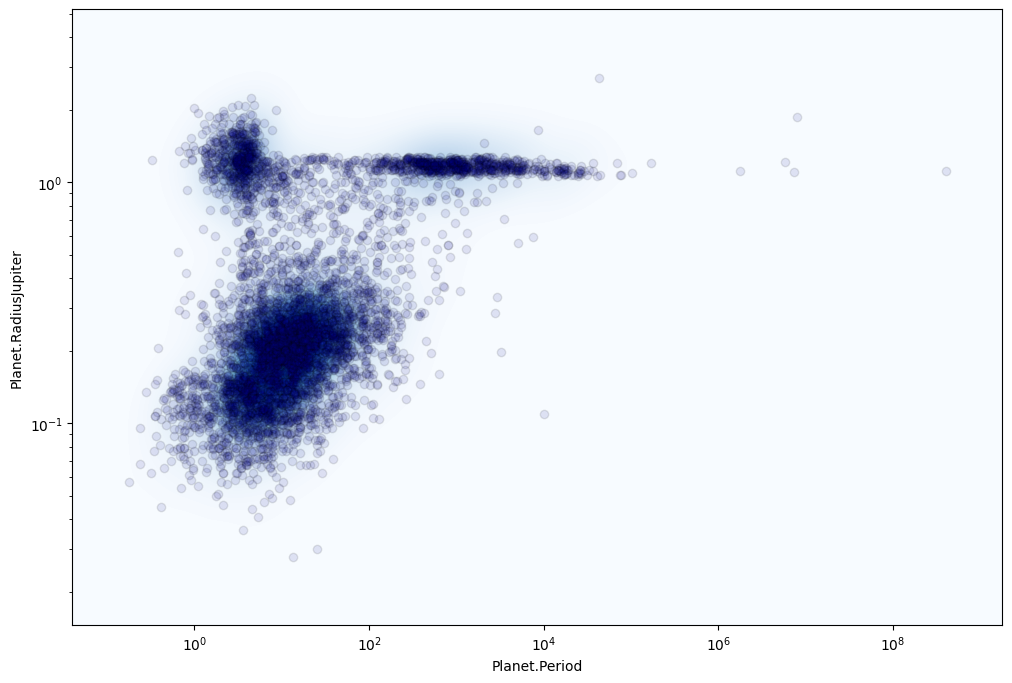

In [8]:
fig, ax = Catalogue.plot_diagram(
    x_key = 'Planet.Period',
    y_key = 'Planet.RadiusJupiter',
    theme='blue'
)

You can print available themes by:

In [ ]:
Catalogue.available_themes()